[PMID: 32579974](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7391009/)

[GSE144240](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE144240)

In [1]:
import sys
from pathlib import Path
p_root = Path('~/link/csMAHN_Spatial').expanduser()
sys.path.append(str(p_root)) if not str(p_root) in sys.path else None

In [2]:
from init import *

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-25 18:48:38.645520: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.



LCC 的python 函数库
为实验室留下些什么吧
0.0.1 2024年5月22日10:48:05

import utils as ut
# help(ut)
print(ut.__doc__)
print(ut.__version__)



In [3]:
df = ut.df.iterdir('GSE144240_RAW', path_match='*GSM*')
with Block('df process'):
    df['gsm_id'] = df['name'].str.extract('^(GSM\\d+)_', expand=False)
    df['patient'] = df['name'].str.extract('(P\\d+)_ST_', expand=False)
    df['repeat'] = df['name'].str.extract('ST_(rep\\d+)', expand=False)
    df['format'] = df['name'].str.extract(
        '\\.(\\w+)\\.?g?z?$', expand=False)

    df['type'] = ''
    df['type'] = df['type'].mask(
        df['name'].str.contains('spot_data'), 'spot')
    df['type'] = df['type'].mask(df['format'].str.match('jpg'), 'img')
    df['type'] = df['type'].mask(
        df['name'].str.contains('stdata'), 'matrix')

    df = df.sort_values('gsm_id,patient,repeat,format'.split(','))
    # display(df.head(3))
    df = df.pivot(index='gsm_id,patient,repeat'.split(','),
                  columns='type', values='path').reset_index()
    df.columns.name = ''
    _temp = ut.df.apply_merge_field(df, '{patient};{repeat}')
    assert _temp.is_unique, '[Error] not unique'
    df.index = _temp.to_numpy()
df

,gsm_id,patient,repeat,img,matrix,spot
P2;rep1,GSM4284316,P2,rep1,GSE144240_RAW/GSM4284316_P2_ST_rep1.jpg,GSE144240_RAW/GSM4284316_P2_ST_rep1_stdata.tsv.gz,GSE144240_RAW/GSM4284316_spot_data-selection-P...
P2;rep2,GSM4284317,P2,rep2,GSE144240_RAW/GSM4284317_P2_ST_rep2.jpg,GSE144240_RAW/GSM4284317_P2_ST_rep2_stdata.tsv.gz,GSE144240_RAW/GSM4284317_spot_data-selection-P...
P2;rep3,GSM4284318,P2,rep3,GSE144240_RAW/GSM4284318_P2_ST_rep3.jpg,GSE144240_RAW/GSM4284318_P2_ST_rep3_stdata.tsv.gz,GSE144240_RAW/GSM4284318_spot_data-selection-P...
P5;rep1,GSM4284319,P5,rep1,GSE144240_RAW/GSM4284319_P5_ST_rep1.jpg,GSE144240_RAW/GSM4284319_P5_ST_rep1_stdata.tsv.gz,GSE144240_RAW/GSM4284319_spot_data-selection-P...
P5;rep2,GSM4284320,P5,rep2,GSE144240_RAW/GSM4284320_P5_ST_rep2.jpg,GSE144240_RAW/GSM4284320_P5_ST_rep2_stdata.tsv.gz,GSE144240_RAW/GSM4284320_spot_data-selection-P...
P5;rep3,GSM4284321,P5,rep3,GSE144240_RAW/GSM4284321_P5_ST_rep3.jpg,GSE144240_RAW/GSM4284321_P5_ST_rep3_stdata.tsv.gz,GSE144240_RAW/GSM4284321_spot_data-selection-P...
P9;rep1,GSM4284322,P9,rep1,GSE144240_RAW/GSM4284322_P9_ST_rep1.jpg,GSE144240_RAW/GSM4284322_P9_ST_rep1_stdata.tsv.gz,GSE144240_RAW/GSM4284322_spot_data-selection-P...
P9;rep2,GSM4284323,P9,rep2,GSE144240_RAW/GSM4284323_P9_ST_rep2.jpg,GSE144240_RAW/GSM4284323_P9_ST_rep2_stdata.tsv.gz,GSE144240_RAW/GSM4284323_spot_data-selection-P...
P9;rep3,GSM4284324,P9,rep3,GSE144240_RAW/GSM4284324_P9_ST_rep3.jpg,GSE144240_RAW/GSM4284324_P9_ST_rep3_stdata.tsv.gz,GSE144240_RAW/GSM4284324_spot_data-selection-P...
P10;rep1,GSM4284325,P10,rep1,GSE144240_RAW/GSM4284325_P10_ST_rep1.jpg,GSE144240_RAW/GSM4284325_P10_ST_rep1_stdata.ts...,GSE144240_RAW/GSM4284325_spot_data-selection-P...


In [4]:
for i, row in df.iterrows():
    pass

row = df.loc['P10;rep2', :]
row


gsm_id                                            GSM4284326
patient                                                  P10
repeat                                                  rep2
img                 GSE144240_RAW/GSM4284326_P10_ST_rep2.jpg
matrix     GSE144240_RAW/GSM4284326_P10_ST_rep2_stdata.ts...
spot       GSE144240_RAW/GSM4284326_spot_data-selection-P...
Name: P10;rep2, dtype: object

In [5]:
p_out = p_cache.joinpath('cSCC_GSE144240_{patient}_{repeat}'.format(**row))
adata = None
if p_out.exists():
    adata = ut.sc.load_adata(p_out)
else:
    adata = sc.read_csv(row['matrix'], delimiter='\t')

    with Block('[spatial]'):
        df_spatial = pd.read_csv(row['spot'], sep='\t')
        df_spatial.index = ut.df.apply_merge_field(
            df_spatial, '{x:.0f}x{y:.0f}')

        display(df_spatial.head(2))
        adata = adata[adata.obs.index.isin(df_spatial.index), :]

        adata.obs = adata.obs.join(df_spatial)
        adata.obsm["spatial"] = adata.obs.loc[:,
                                              'pixel_x,pixel_y'.split(',')].to_numpy()
        adata.obs = adata.obs.drop(columns='pixel_x,pixel_y'.split(','))
        display(adata.obs.head(2), adata.obs.shape)

        # adata.uns['spatial'][library_id ]
        dict_spatial = {k: {}
                        for k in 'images,metadata,scalefactors'.split(',')}
        # images
        dict_spatial['images']['hires'] = mpl.image.imread(row['img'])
        adata.uns['spatial'] = {}
        adata.uns['spatial'][row['patient']] = dict_spatial

        display(adata)
        show_dict_key(adata.uns['spatial'][row['patient']], row['patient'])
        show_dict_key(adata.uns['spatial']
                      [row['patient']]['images'], 'images')

        del df_spatial, dict_spatial

    # adata.var["mt"] = adata.var_names.str.match('^MT-',case=False)
    # adata.var["ribo"] = adata.var_names.str.match('^RP[SL]',case=False)
    # adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]",case=False)
    # sc.pp.calculate_qc_metrics(adata, qc_vars='mt,ribo,hb'.split(','),percent_top=[],
    #                            log1p=False,inplace=True)
    ut.sc.qc(adata)

    display(adata.obs.head(2), adata.obs.shape)

    with mpl.rc_context(pl.figure.rc_frame):
        fig, ax = pl.figure.subplots_get_fig_axs()
        ax.scatter('total_counts', 'n_genes_by_counts', s=5,
                   data=adata.obs)

    fig, axs = pl.figure.subplots_get_fig_axs(
        ncols=2, nrows=2, ratio_ncols=1, ratio_nrows=1)
    for ax, k in zip(
            axs, 'n_genes_by_counts,pct_counts_mt,pct_counts_ribo,pct_counts_hb'.split(',')):
        sns.violinplot(adata.obs, y=k, ax=ax)
        ax.set_frame_on(False)
    fig

    plt.close('all')

    adata = ut.sc.standard_process(adata)
    # save
    ut.sc.save_as_mtx(adata, p_out, layer='counts')

adata

AnnData object with n_obs × n_vars = 621 × 16642
    obs: 'x', 'y', 'new_x', 'new_y', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'leiden'
    var: 'gene_ids'
    uns: 'spatial'
    obsm: 'X_pca', 'X_umap', 'spatial'

# ut.sc.pl [UMAP]

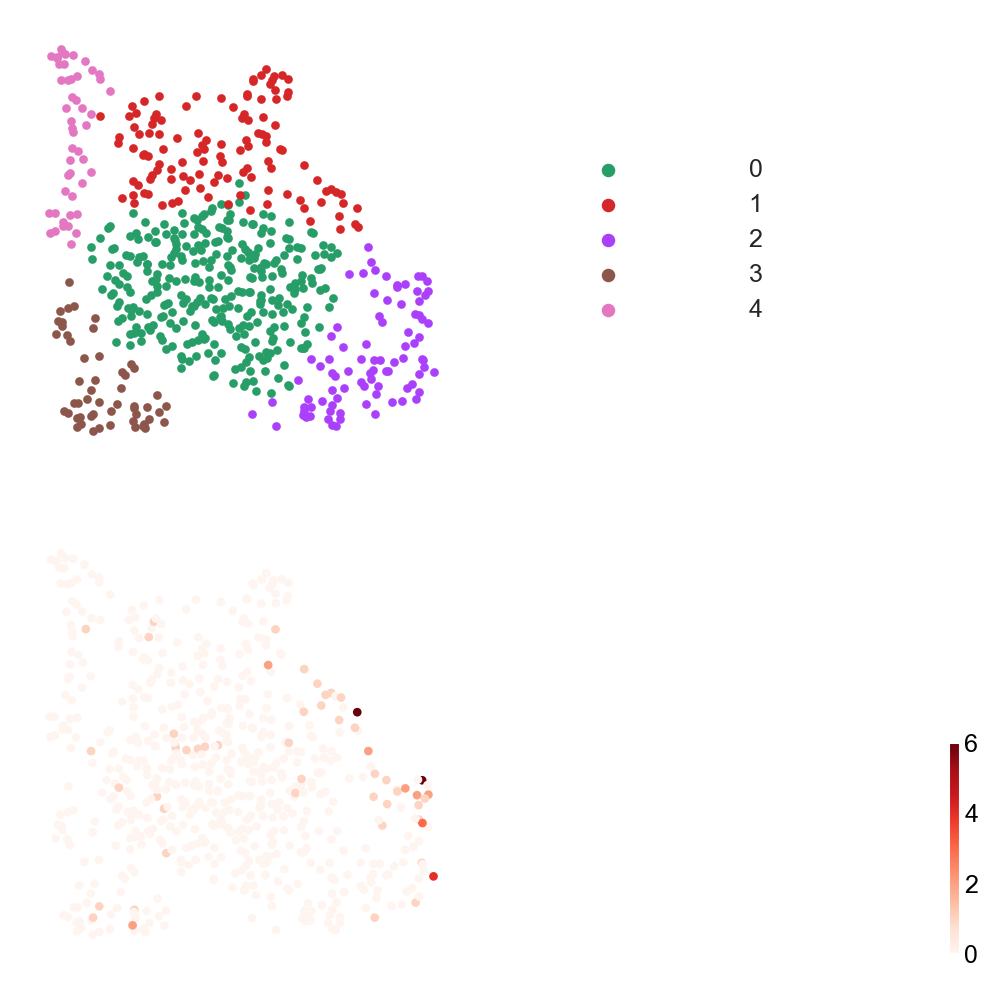

In [6]:
colormap = pl.colormap.get(np.unique(adata.obs['leiden']))
fig, axs = pl.figure.subplots_get_fig_axs(ncols=2, nrows=2)
ax = axs[0]
ut.sc.pl.umap(adata, 'leiden', ax=ax,
              colormap=colormap
              )
ax = axs[1]
pl.colormap.show(colormap, ax=ax, size=30)
ax.set_ymargin(1)

ax = axs[2]
cbr = ut.sc.pl.umap_gene(adata, 'MMP10', ax=ax, draw_cbar=False)

ax = axs[3]
ax.set_axis_off()

kw_cbar = {
    'location': 'right',
    'fraction': .025,  # 在对应方向上的宽度与父轴宽度的比值
    'aspect': 20,  # cbar的长宽比,fraction*aspect 即为cbar的长的占比
    'pad': .02,   # 与父轴的间距
    'anchor': (0, 0)
    # 'ticklocation':'right'
    # 'format': '{x:.1f}'
}
cbar = fig.colorbar(cbr, ax=ax,
                    **kw_cbar)

# mpl.colorbar.Colorbar(ax,cbr,**kw_cbar)

# ut.sc.pl [spatial]

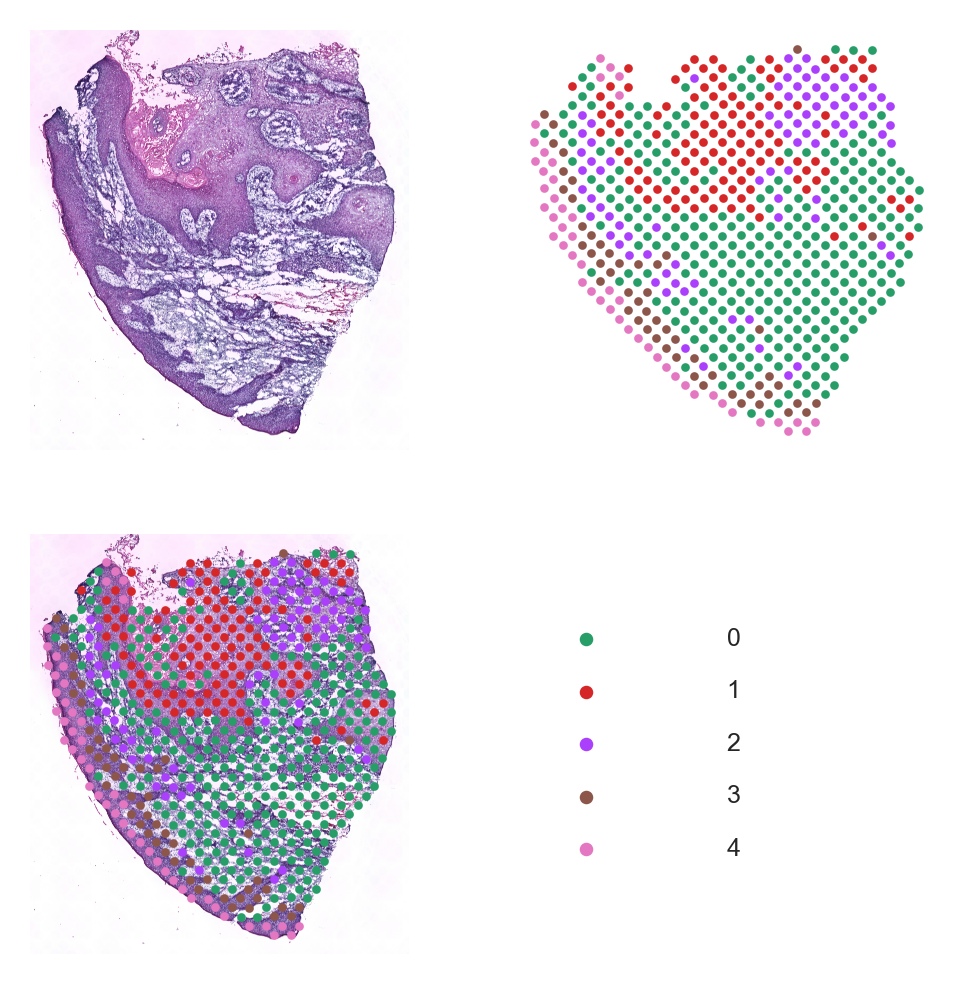

In [7]:
colormap = pl.colormap.get(np.unique(adata.obs['leiden']))
fig, axs = pl.figure.subplots_get_fig_axs(nrows=2, ncols=2)

ax = axs[0]
ut.sc.pl.spatial(adata, key='leiden',
                 key_uns_spatial='P10',
                 key_img="hires", colormap=colormap,
                 scale_factor=1, ax=ax, draw_scatter=False)

ax = axs[1]
ut.sc.pl.spatial(adata, key='leiden',
                 key_uns_spatial='P10',
                 key_img="hires", colormap=colormap,
                 scale_factor=1, ax=ax, draw_img=False)

ax = axs[2]
ut.sc.pl.spatial(adata, key='leiden',
                 key_uns_spatial='P10',
                 key_img="hires", colormap=colormap,
                 scale_factor=1, ax=ax)
ax = axs[3]
pl.colormap.show(colormap, ax=ax, size=30)
ax.set_ymargin(.5)

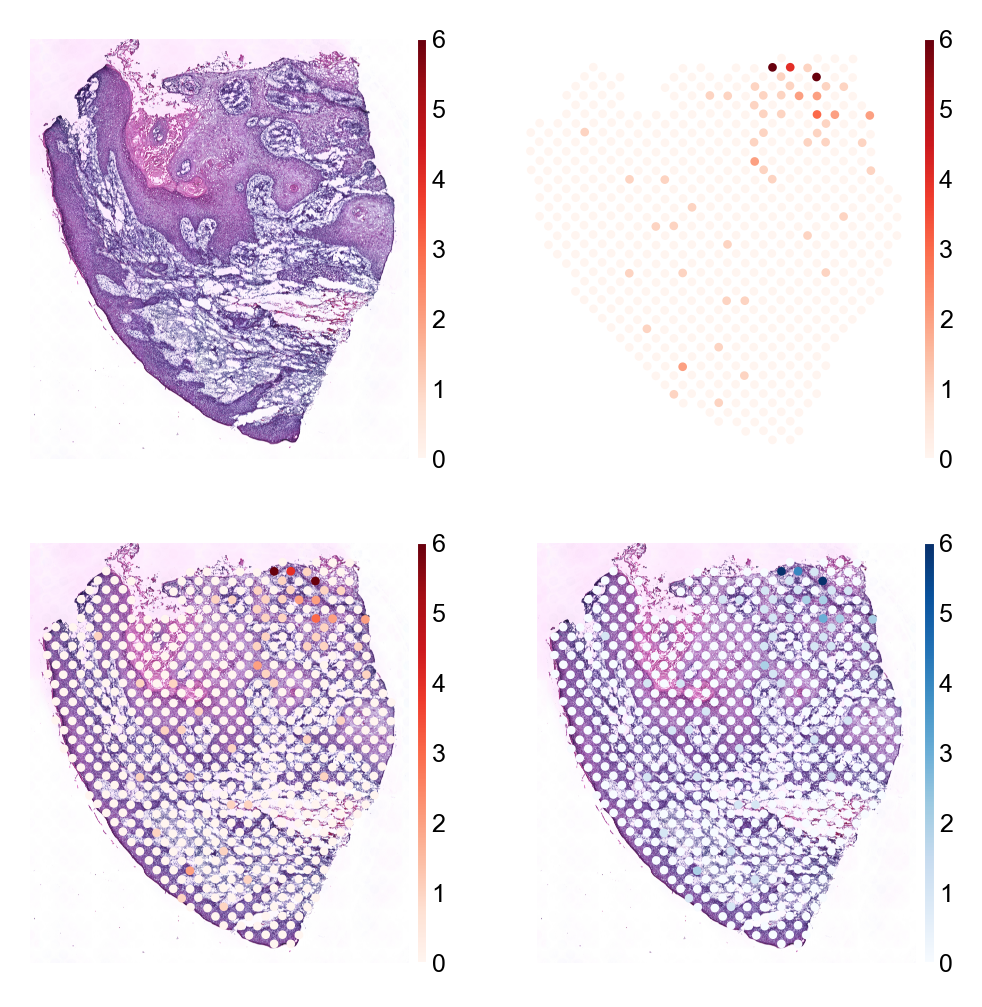

In [8]:
fig, axs = pl.figure.subplots_get_fig_axs(nrows=2, ncols=2)

ax = axs[0]
ut.sc.pl.spatial_gene(adata, key='MMP10',
                      key_uns_spatial=row['patient'],
                      key_img="hires", scale_factor=1,
                      ax=ax, draw_scatter=False)

ax = axs[1]
ut.sc.pl.spatial_gene(adata, key='MMP10',
                      key_uns_spatial=row['patient'],
                      key_img="hires", scale_factor=1,
                      ax=ax, draw_img=False)

ax = axs[2]
ut.sc.pl.spatial_gene(adata, key='MMP10',
                      key_uns_spatial=row['patient'],
                      key_img="hires", scale_factor=1,
                      ax=ax)

ax = axs[3]
ut.sc.pl.spatial_gene(adata, key='MMP10',
                      key_uns_spatial=row['patient'], cmap='Blues',
                      key_img="hires", scale_factor=1,
                      ax=ax)

# 3D

In [9]:
ut.sc.pl.spatial_3d

<function utils.scanpy.pl.spatial_3d(adata, key, ax, colormap=None, scale_factor=1, marker='.', size=10, kw_scatter={}, height=5, query_3d_line='', kw_line={'linewidth': 0.5, 'color': 'grey'}, kw_view_init={'elev': 35, 'azim': -90, 'roll': 0})>

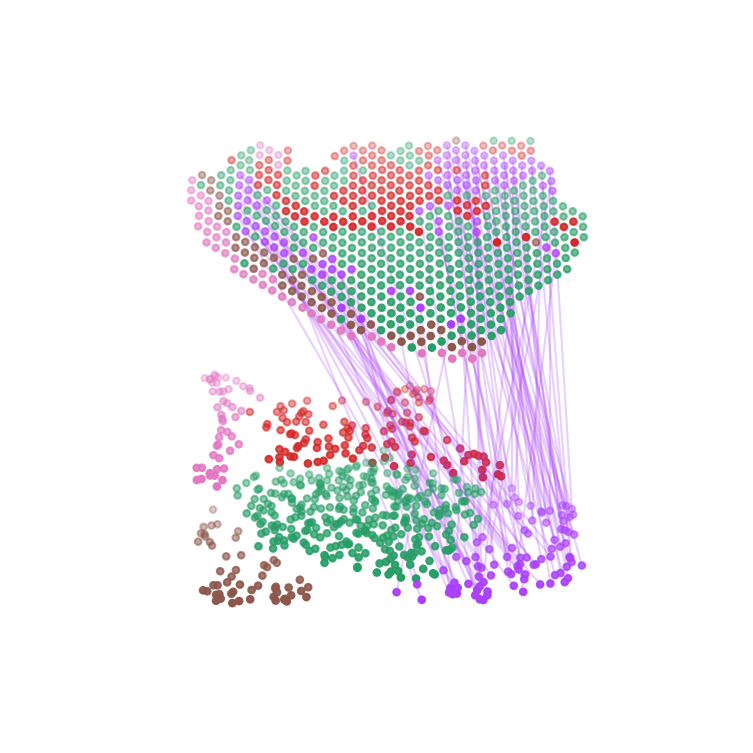

In [10]:
fig, ax = pl.figure.subplots_get_fig_axs(
    ratio_ncols=3, ratio_nrows=3,
    kw_subplot={"projection": "3d"})
df_plot = ut.sc.pl.spatial_3d(adata,'leiden',ax,query_3d_line="leiden == '2'")

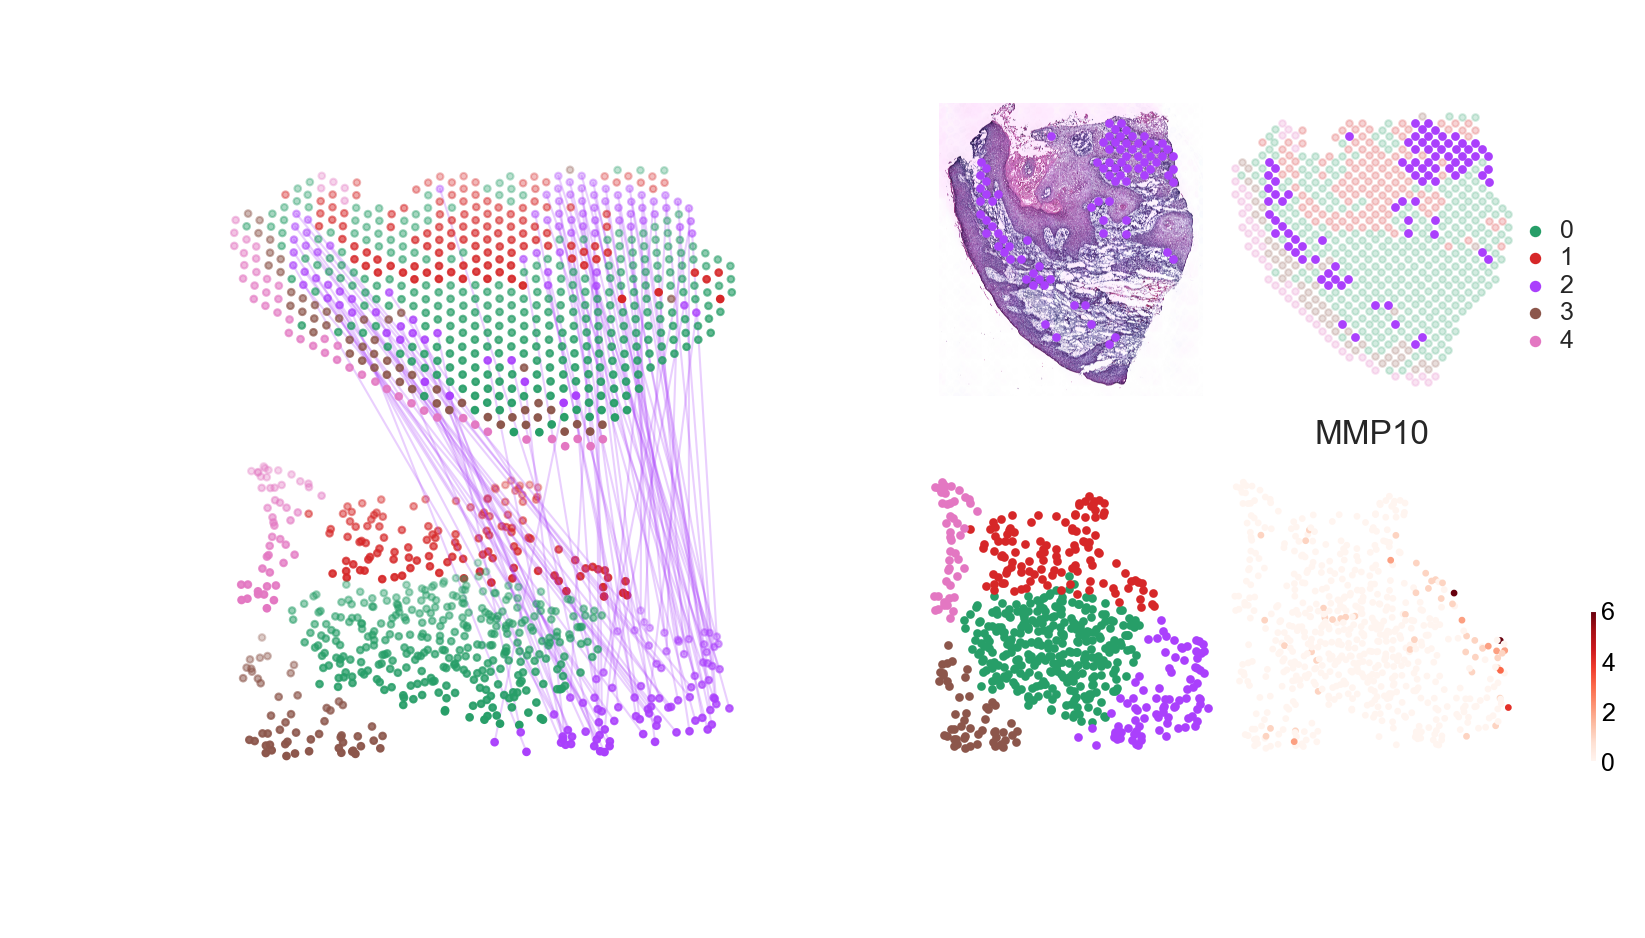

In [14]:
adata.obs['leiden'] = adata.obs['leiden'].astype(str)
# 绘制img太过缓慢，当保存是在绘制
draw_img = True

fa4p  = pl.figure.figure_A4Page()
with Block('spatial_3d'):
    ax = fa4p.add_ax_with_spec(0,0,12,12,projection= '3d')
    df_plot = ut.sc.pl.spatial_3d(adata,'leiden',ax,query_3d_line="leiden == '2'")
with Block('spatial'):
    ax = fa4p.add_ax_with_spec(16,1,4,4)
    ut.sc.pl.spatial(adata, key='leiden',
                     key_uns_spatial='P10',
                     key_img="hires", colormap=colormap,
                     kw_scatter={'alpha':.2},
                     scale_factor=1, ax=ax, draw_img=False)
    ut.sc.pl.spatial(ut.sc.subset_adata(adata,'leiden','2'), key='leiden',
                     key_uns_spatial='P10',
                     key_img="hires", colormap=colormap,
                     scale_factor=1, ax=ax, draw_img=False)
    _temp = ax.get_xlim(),ax.get_ylim()
    
    ax = fa4p.add_ax_with_spec(12,1,4,4)
    ut.sc.pl.spatial(ut.sc.subset_adata(adata,'leiden','2'),
                     key='leiden',key_uns_spatial='P10',
                     key_img="hires", colormap=colormap,
                     scale_factor=1, ax=ax, draw_img=draw_img)
    ax.set_xlim(*_temp[0]),ax.set_ylim(*_temp[1])

    with Block('colormap'):
        ax = fa4p.add_ax_with_spec(20,2,1,3)
        pl.colormap.show(colormap,size=20,ax=ax)
with Block('UMAP'):
    ax = fa4p.add_ax_with_spec(12,6,4,4)
    ut.sc.pl.umap(adata, 'leiden', ax=ax,
                  colormap=colormap
                  )
    
    ax = fa4p.add_ax_with_spec(16,6,4,4)
    cbr = ut.sc.pl.umap_gene(adata, 'MMP10', ax=ax,size=5,
                             draw_cbar=False)
    ax.set_title('MMP10')
    
    with Block('cbar'):
        ax = fa4p.add_ax_with_spec(17,6,4,4)
        ax.set_axis_off()
        kw_cbar = {
            'location': 'right',
            'fraction': .025,  # 在对应方向上的宽度与父轴宽度的比值
            'aspect': 20,  # cbar的长宽比,fraction*aspect 即为cbar的长的占比
            'pad': .02,   # 与父轴的间距
            'anchor': (0, 0)
            # 'ticklocation':'right'
            # 'format': '{x:.1f}'
        }
        cbar = fig.colorbar(cbr, ax=ax,
                            **kw_cbar)
